<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/GRU_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# GRU for Stock Price Prediction

## 1. Introduction

In this tutorial, we will use a Gated Recurrent Unit (GRU) model to predict stock prices based on historical data. GRUs are particularly well-suited for sequential data like stock prices because they can capture temporal dependencies and patterns.

## 2. Stock Data

We will use stock data from Yahoo Finance, which contains information like the opening, closing, high, low prices, and volume traded over time.

Let's start by fetching the stock data.
    

In [1]:

import pandas as pd
import numpy as np
import yfinance as yf

# Fetch stock data from Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2023-01-01')

# Display the first few rows
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373960,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687304,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689539,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021713,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944685,237458000



## 3. Preprocessing the Data

We will preprocess the data by normalizing the closing prices and creating sequences that the GRU can learn from.
    

In [5]:

from sklearn.preprocessing import MinMaxScaler

# We will use the 'Close' column as our target variable
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for the GRU model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60  # Using 60 days of data to predict the next day

# Create the sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_data = scaler.fit_transform(data)
def create_sequences(data, seq_length):
  X = []
  y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

    seq_length = 60
    X, y = creatr_sequences(scaled_data, seq_length)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]


## 4. Building the GRU Model

Now, let's build the GRU model using TensorFlow/Keras.
    

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [13]:
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
    ])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.0194 - val_loss: 7.2767e-04
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 1.7082e-04 - val_loss: 6.9026e-04
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 1.6070e-04 - val_loss: 6.5032e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 1.2668e-04 - val_loss: 6.1391e-04
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 1.3853e-04 - val_loss: 5.9778e-04
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - loss: 1.1702e-04 - val_loss: 5.5216e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 1.1160e-04 - val_loss: 6.2504e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - loss: 1.1624e-04 - val_loss: 5.9237e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 1.1140e-04 - val_loss: 6.5393e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 1.3066e-04 - val_loss: 6.1049e-04



## 5. Evaluating the Model

Let's evaluate the model's performance on the test set.
    

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


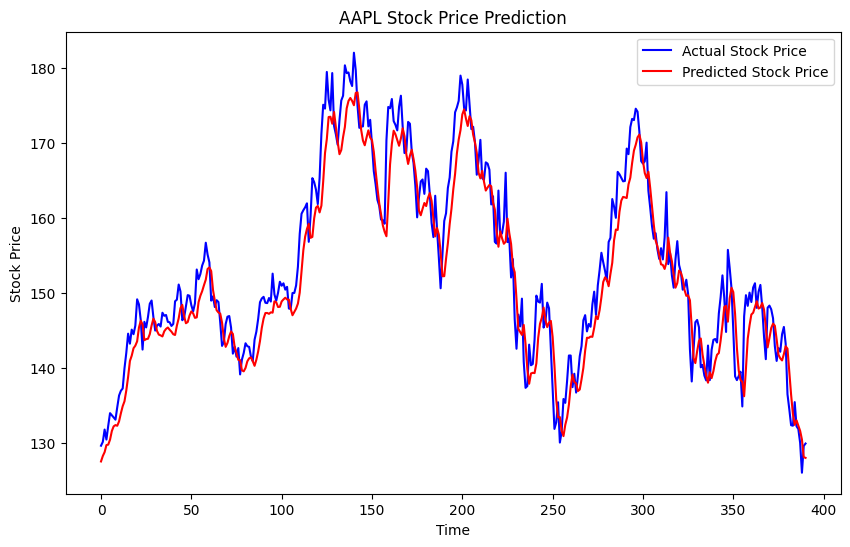

In [15]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:

# Make predictions
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



## 6. Conclusion

In this notebook, we used a GRU model to predict stock prices based on historical data. GRUs are effective for time series forecasting tasks like this one, where the temporal dependencies in the data are important for making accurate predictions.
    